## DAB200 -- Graded Lab 2

In this lab, you will gain some experience in converting non-numeric features in a dataset to numeric so they can be used in a machine learning model.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Note**: There may be other "features" similar to the target, so these need to be removed from the data.

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-4 | veh15.csv |
| 5-7 | veh16.csv |
| 8-10 | veh17.csv |
| 11-14 | veh18.csv |
| 15-18 | veh19.csv |

**Important Notes:**
- Use [Chapter 6](https://mlbook.explained.ai/catvars.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information:
 - Group Number: 11
 - Group Members:
     - Ruturajsinh Solanki - 0827884
     - Crish Chhotai - 0826416
     - Isha Dhaduk - 0827577
     

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - read in the data
 - isolate all numeric features from original data set
 - verify there are no missing values
 - create and evaluate a baseline model 

#### Code (15 marks)

In [24]:
import pandas as pd      
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
import rfpimp
from rfpimp import *
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('veh18.csv')
df

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,5.2,12,22.8444,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,Y,N
1,4.0,8,26.6603,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,N,N
2,6.0,12,20.4316,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
3,6.0,12,21.3382,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
4,1.5,3,36.7632,6,10.0,2,2,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2.0,4,34.2176,8,10.0,2,2,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,N
1159,3.8,8,23.7711,7,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N
1160,3.8,8,23.7711,7,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N
1161,3.8,8,23.7711,7,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Automatic,N,N


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          1163 non-null   float64
 1   # Cyl                              1163 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1163 non-null   float64
 3   # Gears                            1163 non-null   int64  
 4   Max Ethanol % - Gasoline           1163 non-null   float64
 5   Intake Valves Per Cyl              1163 non-null   int64  
 6   Exhaust Valves Per Cyl             1163 non-null   int64  
 7   Fuel Metering Sys Desc             1163 non-null   object 
 8   Air Aspiration Method Desc         1163 non-null   object 
 9   Trans Desc                         1163 non-null   object 
 10  Cyl Deact?                         1163 non-null   object 
 11  Var Valve Lift?                    1163 non-null   objec

In [27]:
df.columns

Index(['Eng Displ', '# Cyl', 'Comb Unadj FE - Conventional Fuel', '# Gears',
       'Max Ethanol % - Gasoline', 'Intake Valves Per Cyl',
       'Exhaust Valves Per Cyl', 'Fuel Metering Sys Desc',
       'Air Aspiration Method Desc', 'Trans Desc', 'Cyl Deact?',
       'Var Valve Lift?'],
      dtype='object')

In [28]:
X_init = df[['Eng Displ', '# Cyl', '# Gears',
       'Max Ethanol % - Gasoline', 'Intake Valves Per Cyl',
       'Exhaust Valves Per Cyl']]
y_init = df[['Comb Unadj FE - Conventional Fuel']]

In [29]:
r2_init = []
oob_init = []
mae_init = []

for i in range(90,101):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=0.2, random_state=42)

    # Create a Random Forest Classifier object
    Regressor = RandomForestRegressor(n_estimators=i, random_state=69, oob_score = True)

    # Train the model on the training data
    Regressor.fit(X_train.values, y_train.values)

    # Make predictions on the testing data
    y_pred = Regressor.predict(X_test)
    
    r2_init.append(Regressor.score(X_train, y_train))
    oob_init.append(Regressor.oob_score_)
    mae_init.append(mean_absolute_error(Regressor.predict(X_test), y_test))

print("R-Squared score: {} \nOut of bag Score: {} \nMean Absolute Error: {}".format(np.mean(r2_init),np.mean(oob_init),np.mean(mae_init)))

R-Squared score: 0.7827882845922552 
Out of bag Score: 0.7165165665879493 
Mean Absolute Error: 3.442357622179799


#### Question (5 marks)

Explain the purpose of creating a baseline model. 

### Purpose of Baseline model:
- Baseline model is created for establishing baseline or reference point for evaluating the performance of more complex or sophisticated models.
- This model provides the simple and straightforward approach of modelling which provides the minimum level of performance that we are expecting to achive.
- It also aids in model selection, comparision, validating the problem, and provides guidance for improvement.

### Part 2 - Convert non-numeric features to numeric

In this part you should: 
 - convert **all** non-numeric features to numeric
 - one of the conversions should use **one-hot encoding**
 - create **one new feature** by combining 2 or more of the existing features
 
#### Code (25 marks)

In [30]:
df.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,5.2,12,22.8444,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,Y,N
1,4.0,8,26.6603,8,10.0,2,2,Multipoint/sequential fuel injection,Turbocharged,Semi-Automatic,N,N
2,6.0,12,20.4316,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
3,6.0,12,21.3382,8,10.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,Semi-Automatic,N,N
4,1.5,3,36.7632,6,10.0,2,2,Spark Ignition Direct Injection,Turbocharged,Semi-Automatic,N,Y


In [31]:
one_hot_encoded = pd.get_dummies(df['Fuel Metering Sys Desc'])

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Remove the original 'Fuel Metering Sys Desc' column
df.drop('Fuel Metering Sys Desc', axis=1, inplace=True)
df.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?,Multipoint/sequential fuel injection,Spark Ignition Direct Injection,Spark Ignition direct & ported injection
0,5.2,12,22.8444,8,10.0,2,2,Turbocharged,Semi-Automatic,Y,N,1,0,0
1,4.0,8,26.6603,8,10.0,2,2,Turbocharged,Semi-Automatic,N,N,1,0,0
2,6.0,12,20.4316,8,10.0,2,2,Naturally Aspirated,Semi-Automatic,N,N,1,0,0
3,6.0,12,21.3382,8,10.0,2,2,Naturally Aspirated,Semi-Automatic,N,N,1,0,0
4,1.5,3,36.7632,6,10.0,2,2,Turbocharged,Semi-Automatic,N,Y,0,1,0


In [32]:
a = df['Air Aspiration Method Desc'].unique()
b = df['Trans Desc'].unique()
c = df['Cyl Deact?'].unique()
d = df['Var Valve Lift?'].unique()
print(a,b,c,d)

['Turbocharged' 'Naturally Aspirated' 'Supercharged'
 'Turbocharged+Supercharged'] ['Semi-Automatic' 'Manual'
 'Automated Manual- Selectable (e.g. Automated Manual with paddles)'
 'Automatic' 'Automated Manual' 'Continuously Variable'
 'Selectable Continuously Variable (e.g. CVT with paddles)'] ['Y' 'N'] ['N' 'Y']


In [33]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Perform label encoding on the specified columns
df['Air Aspiration Method Desc'] = label_encoder.fit_transform(df['Air Aspiration Method Desc'])
df['Trans Desc'] = label_encoder.fit_transform(df['Trans Desc'])
df['Cyl Deact?'] = label_encoder.fit_transform(df['Cyl Deact?'])
df['Var Valve Lift?'] = label_encoder.fit_transform(df['Var Valve Lift?'])

df.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?,Multipoint/sequential fuel injection,Spark Ignition Direct Injection,Spark Ignition direct & ported injection
0,5.2,12,22.8444,8,10.0,2,2,2,6,1,0,1,0,0
1,4.0,8,26.6603,8,10.0,2,2,2,6,0,0,1,0,0
2,6.0,12,20.4316,8,10.0,2,2,0,6,0,0,1,0,0
3,6.0,12,21.3382,8,10.0,2,2,0,6,0,0,1,0,0
4,1.5,3,36.7632,6,10.0,2,2,2,6,0,1,0,1,0


In [34]:
e = df['Air Aspiration Method Desc'].unique()
f = df['Trans Desc'].unique()
g = df['Cyl Deact?'].unique()
h = df['Var Valve Lift?'].unique()
print(e,f,g,h)

[2 0 1 3] [6 4 1 2 0 3 5] [1 0] [0 1]


#### Explanation (25 marks)

Please provide an explanation for each conversion from non-numeric to numeric and state why this conversion is appropriate. Please also provide an explanation of the new feature created.  

#### For converting non-numeric columns to numeric columns, we have used two encoding techniques:
    
#### 1. One-Hot Encoding
- To apply One-Hot Encoding on the column 'Fuel Metering Sys Desc', we have used pd.get_dummies().
- The One-Hot Encoding converts each unique category into a separate binary column. If a data point belongs to a specific category, the corresponding binary column will be marked with 1, and 0 otherwise.
- We have three catagorical values in 'Fuel Metering Sys Desc' column, thus after encoding we have three new binary columns.
    
#### 2. Label Encoding
- We have applied Label Encoding to four catagorical columns namely Air Aspiration Method Desc', 'Trans Desc', 'Cyl Deact?', and 'Var Valve Lift?'.
- Label encoding converts each unique category into a numeric value ranging from 0 to the number of unique categories minus one.
- This conversion is appropriate when the categorical column has ordinal information, meaning there is an inherent order or hierarchy among the categories.
- In our data, all this columns have hierarchy among the catagories.
- For example in 'Air Aspiration Method Desc' column the heirarchy is like: Turbocharged' > 'Supercharged' > 'Naturally Aspirated'
    

### Part 3 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features from Parts 1 and 2 above 

#### Code (15 marks)

In [35]:
X_conv = df.drop('Comb Unadj FE - Conventional Fuel', axis = 1)
y_conv = df[['Comb Unadj FE - Conventional Fuel']]

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_conv, y_conv, test_size=0.2, random_state=42)

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest Regressor object
regressor = RandomForestRegressor(random_state=69, oob_score=True)

# Perform grid search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

# Train the model on the training data with the best hyperparameters
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = best_model.score(X_train, y_train)
oob = best_model.oob_score_
mae = mean_absolute_error(y_pred, y_test)

print("R-Squared score: {}\nOut of bag Score: {}\nMean Absolute Error: {}".format(r2, oob, mae))


Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 98}
R-Squared score: 0.9418370796091607
Out of bag Score: 0.878946253426192
Mean Absolute Error: 2.300965529230752


### Part 4 - Feature importances and comparison (10 marks)

In this part you should:
 - calculate the percent difference between the results of Part 1 and Part 3 (make sure you are using the correct formula for percent difference) 
 - based on the percent difference, state whether or not the results of Part 3 are an improvement over the results of Part 1
 - use the `rfpimp` package to calculate and display the feature importances for all features

In [37]:
# Results of Part 1
r2_part1 = 0.7827882845922552
oob_part1 = 0.7165165665879493
mae_part1 = 3.442357622179799

# Results of Part 3
r2_part3 = 0.9418370796091607
oob_part3 = 0.878946253426192
mae_part3 = 2.300965529230752

# Calculate percent difference for R-Squared score
r2_percent_diff = ((r2_part3 - r2_part1) / ((r2_part1 + r2_part3) / 2)) * 100

# Calculate percent difference for Out of bag Score
oob_percent_diff = ((oob_part3 - oob_part1) / ((oob_part1 + oob_part3) / 2)) * 100

# Calculate percent difference for Mean Absolute Error
mae_percent_diff = ((mae_part3 - mae_part1) / ((mae_part1 + mae_part3) / 2)) * 100

# Print the percent differences
print("Percent Difference in R-Squared score: {:.2f}%".format(r2_percent_diff))
print("Percent Difference in Out of bag Score: {:.2f}%".format(oob_percent_diff))
print("Percent Difference in Mean Absolute Error: {:.2f}%".format(mae_percent_diff))


Percent Difference in R-Squared score: 18.44%
Percent Difference in Out of bag Score: 20.36%
Percent Difference in Mean Absolute Error: -39.75%


### Based on the calculated percent differences, we can observe the following:

- The R-Squared score of Part 3 is approximately 18.45% higher than that of Part 1.
- The Out of bag Score of Part 3 is approximately 20.36% higher than that of Part 1.
- The Mean Absolute Error of Part 3 is approximately 39.75% lower than that of Part 1.
- Therefore, the results of Part 3 represent an improvement over the results of Part 1. The higher R-Squared score, Out of bag Score, and lower Mean Absolute Error indicate better predictive performance in Part 3 compared to Part 1.

In [38]:
# Calculate feature importances using rfpimp
imp = rfpimp.importances(best_regressor, X_conv, y_conv)

# Display feature importances
print(imp)

                                          Importance
Feature                                             
Eng Displ                                   0.567196
# Cyl                                       0.230756
Air Aspiration Method Desc                  0.154057
Trans Desc                                  0.128495
# Gears                                     0.104952
Max Ethanol % - Gasoline                    0.055054
Var Valve Lift?                             0.050291
Spark Ignition direct & ported injection    0.023227
Cyl Deact?                                  0.020794
Multipoint/sequential fuel injection        0.012746
Spark Ignition Direct Injection             0.011341
Exhaust Valves Per Cyl                      0.004870
Intake Valves Per Cyl                       0.002190


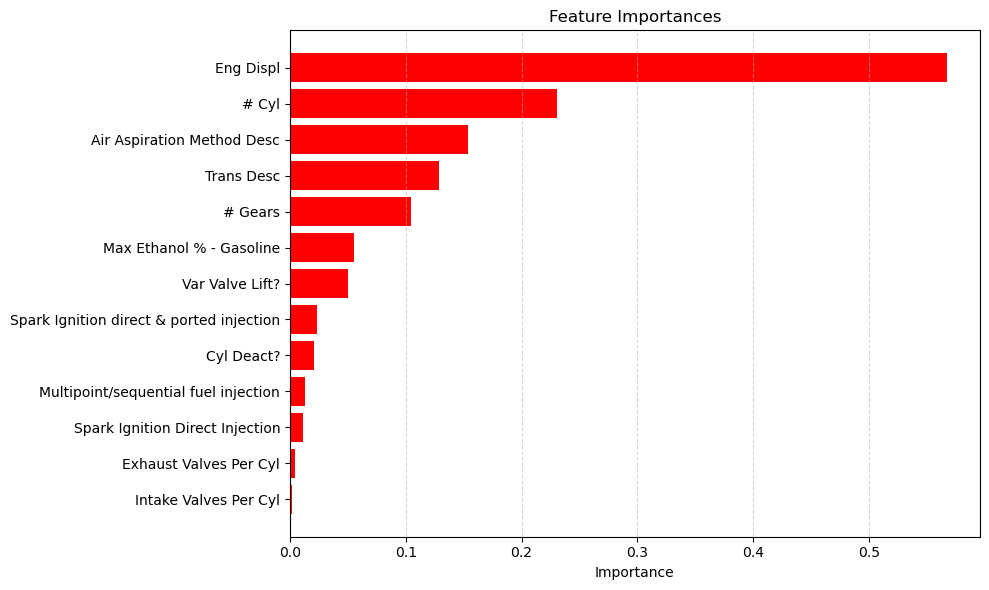

In [45]:
# Sort the DataFrame by importance values
imp = imp.sort_values('Importance', ascending=True)

# Create a visually striking bar plot
plt.figure(figsize=(10, 6))
plt.barh(imp.index, imp['Importance'], color='red')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Question (5 marks)

Based on the feature importances, are any features that you think should be removed from the data set.  Why do you think these features should be removed? 

#### Feature Importance:
- As we can see Intake valve Per Cyl and Exhaust Valve per Cyl these two features have relatively very low importances. These features can be removed.
- The reasoning for this is thier low importance. Also, there are other factors that can be considered for other feature's removal. But we need to consider more validation techniques before removing other features.